<a href="https://colab.research.google.com/github/Syntax-code/Machine-Learning/blob/master/Spam_Not_Spam_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
	  import nltk
	  nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [1]:
!pip install kaggle --upgrade
!kaggle --version
from google.colab import files
files.upload()

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kartikchourasiya","key":"807c8d14f49cd514a2015f84a2a567f1"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#chamge permission
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 31.1MB/s]


In [4]:
!unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [29]:
import numpy as np
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [9]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df = df.iloc[:, 0:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [17]:
df['v1'] = df['v1'].apply(lambda x : 0 if x == 'ham' else 1)
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['v1'].value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [23]:
df = df.rename(columns = {'v1' : 'Spam/Not_Spam', 'v2' : 'message'})

In [37]:
message = df.iloc[:, 1].copy()
test = message[0]
message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [43]:
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [ ]:
text_preprocess(test)

Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat


'Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat'

In [44]:
message = message.apply(text_preprocess)
message

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u U å£750 Pound prize...
5568                          Ì b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: message, Length: 5572, dtype: object

<h3>Term Frequency (TF)

The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.

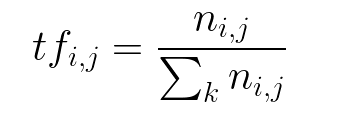



<h3>Inverse Data Frequency (IDF)

The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

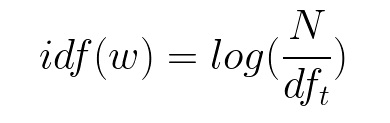

<h3> TF-IDF

TF-IDF is simply the TF multiplied by IDF.

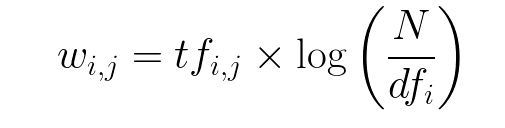

<h2>The more common the word across documents, the lower its score and the more unique a word is to our first document the higher the score. 

In [45]:
vectorizer = TfidfVectorizer("english")

In [48]:
message_mat = vectorizer.fit_transform(message)
message_mat

<5572x9376 sparse matrix of type '<class 'numpy.float64'>'
	with 47254 stored elements in Compressed Sparse Row format>

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(message_mat, 
                                                        df['Spam/Not_Spam'], test_size=0.3, random_state=20)

In [50]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('SGD', SGDClassifier()))
print(models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('CART', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')), ('NB', GaussianNB(priors=None

In [53]:
seed = 7
scoring = 'accuracy'

In [55]:
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.938974 (0.012286)
KNN: 0.899487 (0.006364)
CART: 0.963077 (0.008520)
NB: nan (nan)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

  FitFailedWarning)


SVM: 0.968205 (0.009116)
SGD: 0.976154 (0.008737)


In [56]:
RFC = RandomForestClassifier()
res = model_selection.cross_val_score(model, X_train, Y_train)
res.mean()

0.9758974358974358

In [57]:
from sklearn.metrics import accuracy_score

Spam_model = SGDClassifier()
Spam_model.fit(X_train, Y_train)
pred = Spam_model.predict(X_test)
accuracy_score(Y_test,pred)

0.9742822966507177

<h2>Stemming

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP)

In [58]:
def stemmer(text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [59]:
message = message.apply(stemmer)
vectorizer = TfidfVectorizer("english")
message_mat = vectorizer.fit_transform(message)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(message_mat, 
                                                        df['Spam/Not_Spam'], test_size=0.3, random_state=20)

In [61]:
from sklearn.metrics import accuracy_score

Spam_model = SGDClassifier()
Spam_model.fit(X_train, Y_train)
pred = Spam_model.predict(X_test)
accuracy_score(Y_test,pred)

0.9766746411483254

In [62]:
df['length'] = df['message'].apply(len)
df.head()

,Spam/Not_Spam,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
